In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('./Cleaned Data/cleaned_Data.csv')
X = dataset[['PrevAVGCost', 'PrevAssignedCost', 'AVGCost', 'LatestDateCost', 'A', 'B', 'C', 'D', 'E', 'F', 'G']]
y = dataset['GenPrice']

In [6]:
X

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G
0,27.919192,33.0,28.545455,20.535354,1,0,0,0,0,0,0
1,57.333333,63.0,56.121212,61.838384,1,0,0,0,0,0,0
2,50.777778,54.0,45.131313,50.000000,1,0,0,0,0,0,0
3,45.747475,56.0,40.525253,38.080808,0,1,0,0,0,0,0
4,45.747475,56.0,40.525253,38.080808,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
24621,0.000000,60.0,0.000000,0.000000,0,0,0,0,0,0,1
24622,80.808081,96.0,0.000000,0.000000,0,0,0,0,0,0,1
24623,0.000000,23.0,25.131313,25.131313,0,0,0,0,0,0,1
24624,151.515152,201.0,181.818182,181.818182,0,0,0,0,0,0,1


In [7]:
y

0         41.0
1         92.0
2         76.0
3         75.0
4         75.0
         ...  
24621     87.0
24622    126.0
24623     40.0
24624    271.0
24625    107.0
Name: GenPrice, Length: 24626, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(19700, 11) (19700,) (4926, 11) (4926,)


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
trainSet = pd.concat([X_train, y_train], axis = 1)
trainSet.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
17651,12.049180,30.0,18.196721,22.967213,1,0,0,0,0,0,0,42.0
22606,124.793814,130.0,0.000000,0.000000,0,0,1,0,0,0,0,169.0
14124,28.343434,29.0,32.959596,40.949495,0,0,1,0,0,0,0,60.0
5777,21.506024,24.0,22.963855,29.000000,1,0,0,0,0,0,0,36.0
15500,12.557895,13.0,14.452632,16.463158,1,0,0,0,0,0,0,25.0


In [12]:
testSet = pd.concat([X_test, y_test], axis = 1)
testSet.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
12301,18.919192,20.0,17.707071,17.757576,1,0,0,0,0,0,0,27.0
13317,62.808081,67.0,73.484848,74.656566,1,0,0,0,0,0,0,105.0
12320,0.000000,61.0,0.000000,0.000000,1,0,0,0,0,0,0,88.0
4013,107.747475,110.0,80.808081,80.808081,0,0,0,0,0,0,1,142.0
7807,40.606061,50.0,61.505051,66.222222,0,0,1,0,0,0,0,99.0


In [13]:
y_pred = regressor.predict(X_test)
y_pred

array([32.39833046, 93.59897177, 85.36141747, ..., 98.0640314 ,
       30.07889309, 44.21871812])

In [14]:
predVal = pd.concat([X_test, y_test], axis = 1)
predVal.head()

,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice
12301,18.919192,20.0,17.707071,17.757576,1,0,0,0,0,0,0,27.0
13317,62.808081,67.0,73.484848,74.656566,1,0,0,0,0,0,0,105.0
12320,0.000000,61.0,0.000000,0.000000,1,0,0,0,0,0,0,88.0
4013,107.747475,110.0,80.808081,80.808081,0,0,0,0,0,0,1,142.0
7807,40.606061,50.0,61.505051,66.222222,0,0,1,0,0,0,0,99.0


In [29]:
datasetPredict = pd.concat([testSet.reset_index(), pd.Series(y_pred, name = 'PredictedGenPrice')], axis = 1).round(2)
datasetPredict.loc[:, ['GenPrice', 'PredictedGenPrice']].tail(10)

,GenPrice,PredictedGenPrice
4916,61.0,58.76
4917,101.0,95.76
4918,53.0,55.11
4919,23.0,26.04
4920,142.0,140.08
4921,386.0,378.76
4922,229.0,232.89
4923,102.0,98.06
4924,26.0,30.08
4925,39.0,44.22


In [16]:
datasetPredict.corr()

,index,PrevAVGCost,PrevAssignedCost,AVGCost,LatestDateCost,A,B,C,D,E,F,G,GenPrice,PredictedGenPrice
index,1.000000,-0.005980,0.003228,-0.004309,0.006373,-0.018983,-0.007056,0.006269,0.018399,0.012576,0.002493,0.012633,0.007801,0.003483
PrevAVGCost,-0.005980,1.000000,0.525551,0.784302,0.764423,-0.059053,0.124087,0.148206,-0.056017,-0.079911,0.080937,-0.101463,0.494235,0.498837
PrevAssignedCost,0.003228,0.525551,1.000000,0.524154,0.462267,-0.117272,0.105027,0.170726,-0.068318,-0.094067,0.037458,-0.028785,0.981192,0.997448
AVGCost,-0.004309,0.784302,0.524154,1.000000,0.878765,-0.055066,0.126399,0.132833,-0.054911,-0.079057,0.076166,-0.094352,0.529382,0.540697
LatestDateCost,0.006373,0.764423,0.462267,0.878765,1.000000,-0.050260,0.149702,0.146129,-0.053841,-0.079573,0.085198,-0.125042,0.473442,0.469909
A,-0.018983,-0.059053,-0.117272,-0.055066,-0.050260,1.000000,-0.254609,-0.424238,-0.097037,-0.119567,-0.077771,-0.593428,-0.130243,-0.128381
B,-0.007056,0.124087,0.105027,0.126399,0.149702,-0.254609,1.000000,-0.105758,-0.024190,-0.029807,-0.019388,-0.147936,0.099396,0.101129
C,0.006269,0.148206,0.170726,0.132833,0.146129,-0.424238,-0.105758,1.000000,-0.040307,-0.049665,-0.032304,-0.246495,0.195184,0.193220
D,0.018399,-0.056017,-0.068318,-0.054911,-0.053841,-0.097037,-0.024190,-0.040307,1.000000,-0.011360,-0.007389,-0.056381,-0.073099,-0.073220
E,0.012576,-0.079911,-0.094067,-0.079057,-0.079573,-0.119567,-0.029807,-0.049665,-0.011360,1.000000,-0.009105,-0.069472,-0.101863,-0.102225


In [17]:
print("Training set accuracy = " + str(regressor.score(X_train, y_train)))
print("Test set accuracy = " + str(regressor.score(X_test, y_test)))

Training set accuracy = 0.9744516391509681
Test set accuracy = 0.9662655869064141


In [18]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 341.63442723560377


In [19]:
def mean_absolute_percentage_error(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 10.289084465491893


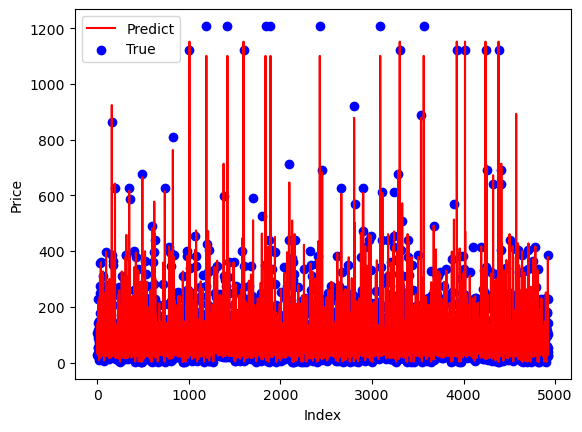

In [20]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(y_pred))], y_pred, color = 'r')
plt.scatter([i for i in range(len(y_pred))], y_test, color = 'b')
plt.ylabel('Price')
plt.xlabel('Index')
plt.legend(['Predict', 'True'], loc = 'best')
plt.show()

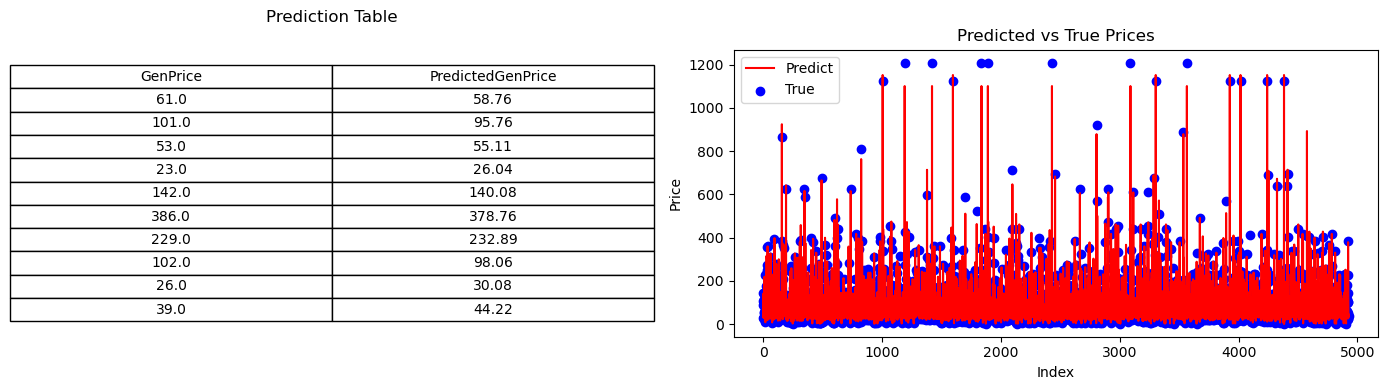

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


df_to_plot = datasetPredict.loc[:, ['GenPrice', 'PredictedGenPrice']].tail(10)


fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 


axs[0].axis('off')
table = axs[0].table(cellText=df_to_plot.values,
                     colLabels=df_to_plot.columns,
                     loc='center',
                     cellLoc='center')
table.scale(1, 1.5)
axs[0].set_title("Prediction Table", pad=20)


axs[1].plot([i for i in range(len(y_pred))], y_pred, color='r')
axs[1].scatter([i for i in range(len(y_test))], y_test, color='b')
axs[1].set_ylabel('Price')
axs[1].set_xlabel('Index')
axs[1].legend(['Predict', 'True'], loc='best')
axs[1].set_title("Predicted vs True Prices")


plt.tight_layout()
plt.savefig("Linear_Regression_results.png", dpi=300)
plt.show()


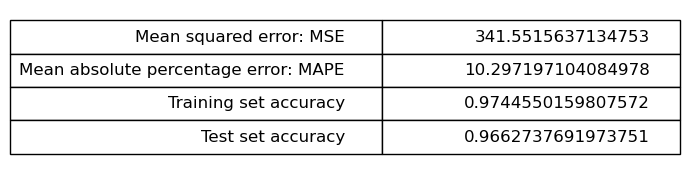

In [33]:
import matplotlib.pyplot as plt


metrics_data = [
    ["Mean squared error: MSE", 341.5515637134753],
    ["Mean absolute percentage error: MAPE", 10.297197104084978],
    ["Training set accuracy", 0.9744550159807572],
    ["Test set accuracy", 0.9662737691973751]
]


fig, ax = plt.subplots(figsize=(8, 2)) 
ax.axis('off') 


table = ax.table(cellText=metrics_data, colWidths=[0.5, 0.4], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2) 



plt.savefig("model_metrics(Linear_regression).png", bbox_inches='tight', dpi=300)
plt.show()